<a href="https://colab.research.google.com/github/Bodya911/INF4039_Deep_learning/blob/main/deep_learning_ind_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INF4039 Deep Learning Systems**

## Individual project

### **Bohdan Zhyhun**
### IF2000102




In [38]:
#Mount google drive space with datafiles
from google.colab import drive
drive.mount('/content/drive')
BASE_PATH = '/content/drive/MyDrive/Deep_learning/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
data = pd.read_csv(BASE_PATH+'diabetes_binary.csv')

## 1. Dataset description:

diabetes_binary.csv is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.

Overview:


* Columns: The dataset contains 22 columns, each representing a different attribute.
* Target Variable: 'Diabetes_binary' is likely the target variable, indicating the presence (1) or absence (0) of diabetes.
* Health-Related Features: Other columns include various health-related features such as 'HighBP' (high blood pressure), 'HighChol' (high cholesterol), 'CholCheck' (cholesterol check), 'BMI' (body mass index), 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', and more.
* General Health Metrics: There are columns like 'GenHlth' (general health), 'MentHlth' (mental health), 'PhysHlth' (physical health), and 'DiffWalk' (difficulty walking).
* Demographic Information: It also includes demographic information such as 'Sex', 'Age', 'Education', and 'Income'.
* Healthcare Access: 'AnyHealthcare' and 'NoDocbcCost' might indicate access to healthcare and financial barriers to seeing a doctor, respectively.

Summary of the dataset:

* Number of Rows: 70,692
* Number of Columns: 22
* Missing Values: There are no missing values in any of the columns.
* Basic Statistics:
  1. Target Variable ('Diabetes_binary'): Equal distribution of 0s and 1s, indicating a balanced dataset regarding the presence/absence of diabetes.
  2. Health-Related Features: Features like 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', etc., are primarily binary (0 or 1), with varying mean values indicating different prevalence rates.
  3. BMI: Varies from 12 to 98 with an average of around 29.86.
  4. General Health Metrics ('GenHlth', 'MentHlth', 'PhysHlth'): These features have wider ranges and different distributions.
  5. Demographic Information ('Sex', 'Age', 'Education', 'Income'): Categorical/demographic data, with 'Age' ranging from 1 to 13 (likely coded), 'Education' from 1 to 6, and 'Income' from 1 to 8.
  6. Healthcare Access ('AnyHealthcare', 'NoDocbcCost'): Primarily binary, indicating aspects of healthcare accessibility.



## 2. Goals and objectives

Goals:

- **Predictive Accuracy:** Develop machine learning models that accurately predict diabetes occurrence in individuals based on health metrics and lifestyle factors.

- **Insight Generation:** Gain insights into the key factors that contribute to the risk of diabetes, which can be valuable for preventive health measures.

- **Model Comparison:** Compare different machine learning approaches (k-NN, Decision Trees, MLP, LSTM) to identify the most effective model for predicting diabetes.

- **Optimization and Validation:** Optimize the chosen models for the best performance and validate their effectiveness on unseen data.



Objectives:

- **Data Preparation and Cleaning:** Prepare the dataset for analysis by cleaning, handling missing values, and normalizing data.

- **Feature Analysis:** Identify and analyze the most significant features contributing to diabetes using exploratory data analysis techniques.

- **Model Development:** Implement and train various machine learning models, including k-NN, MLP, and LSTM. Tune hyperparameters to improve model performance.

- **Performance Evaluation:** Evaluate models based on metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

- **Comparative Analysis:** Compare the performance of different models.
Identify strengths and weaknesses of each model in terms of prediction accuracy, training time, and complexity.

- **Insight Extraction and Reporting:** Extract actionable insights from model predictions and feature importances. Prepare a comprehensive report detailing findings, methodologies, and recommendations.


## 3. Data preparation and exploratory data analysis

In [9]:
# Display the first few rows of the dataset for understanding
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [10]:
# Basic information about the DataFrame
df_info = data.info()
df_description = data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [11]:
data.shape

(70692, 22)

In [12]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

No missing values

In [13]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier detection using IQR for continuous variables
# Selecting continuous variables
continuous_vars = ['BMI', 'MentHlth', 'PhysHlth']
outliers = {}

# Calculating IQR for each continuous variable
for var in continuous_vars:
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = ((data[var] < (Q1 - 1.5 * IQR)) | (data[var] > (Q3 + 1.5 * IQR)))
    outliers[var] = data[outlier_condition]


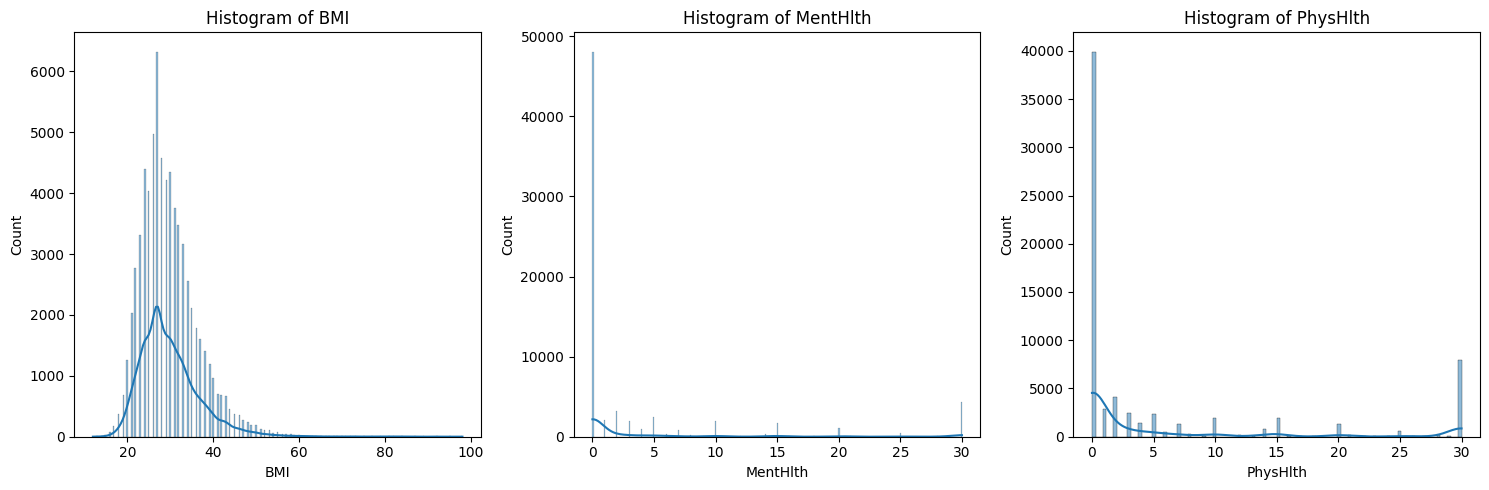

In [48]:
# Histograms for some continuous variables
plt.figure(figsize=(15, 5))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[var], kde=True)
    plt.title(f'Histogram of {var}')

plt.tight_layout()
plt.show()


The histograms for 'BMI', 'MentHlth', and 'PhysHlth' show the distribution of these variables. 'BMI' shows a right-skewed distribution, suggesting a higher prevalence of overweight and obese individuals in the dataset.

Outlier Detection:

'BMI': Outliers were detected in the 'BMI' column. These are values significantly higher than the normal range, such as BMI values of 58, 47, etc.

'MentHlth' and 'PhysHlth': outliers are not such visible.

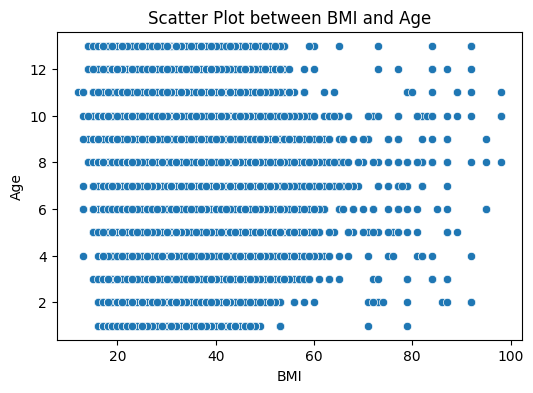

In [43]:
# Scatter plot between 'BMI' and 'Age'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='BMI', y='Age', data=data)
plt.title('Scatter Plot between BMI and Age')
plt.show()


This plot does not indicate a clear linear relationship between 'BMI' and 'Age'. However, it helps in visualizing the spread and range of these variables in the dataset.


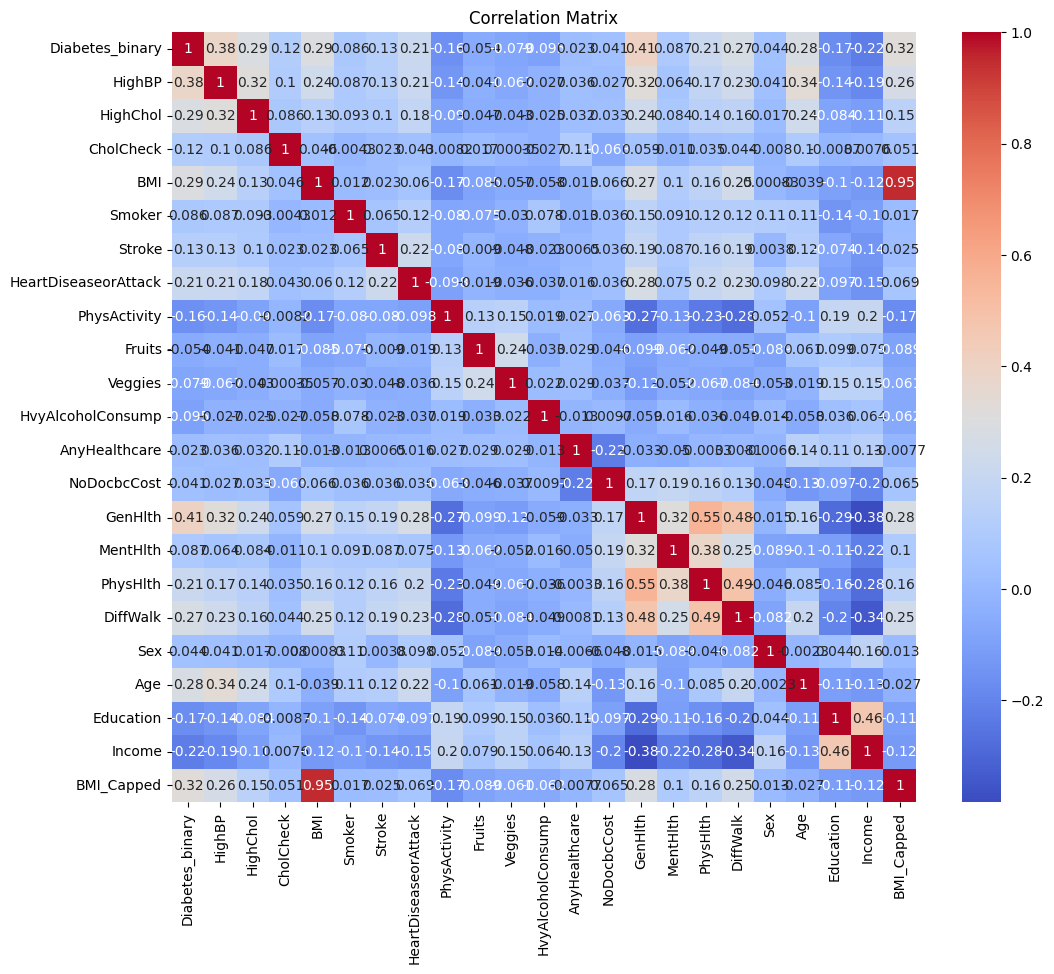

In [40]:
# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* The correlation matrix provides insights into the relationships between variables. For instance, 'GenHlth' (general health) shows moderate correlation with 'PhysHlth' (physical health) and 'MentHlth' (mental health), indicating that general health perceptions are somewhat aligned with specific physical and mental health experiences.
* The target variable 'Diabetes_binary' shows the strongest correlations with 'Age', 'HighBP' (high blood pressure), and 'HighChol' (high cholesterol), suggesting these are important factors associated with diabetes.


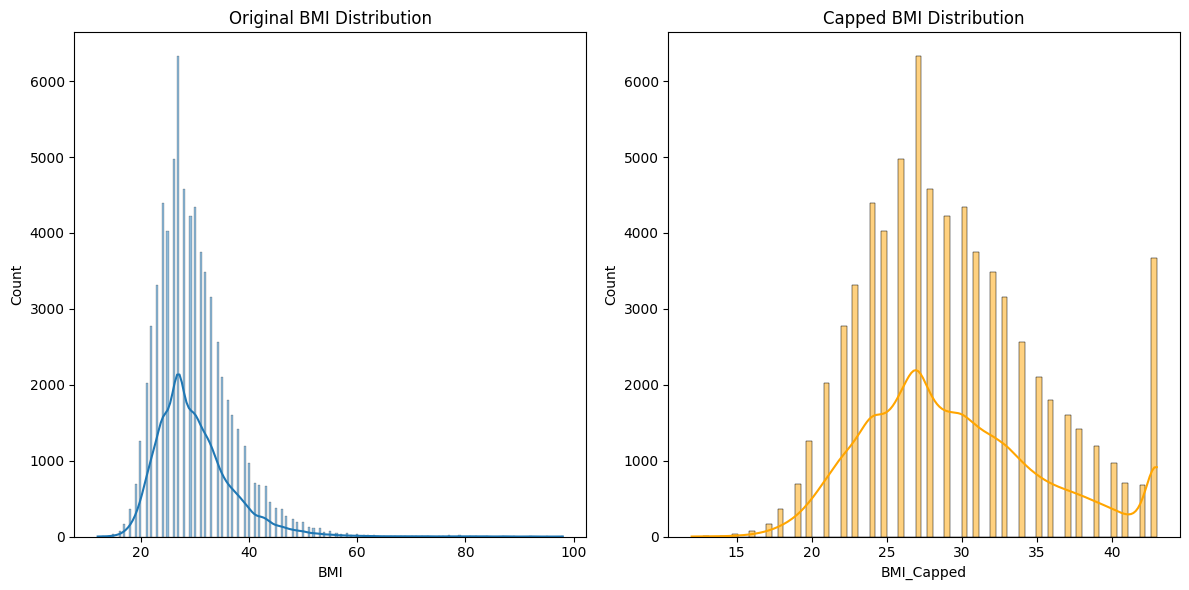

(43.0,
                 BMI    BMI_Capped
 count  70692.000000  70692.000000
 mean      29.856985     29.540160
 std        7.113954      6.058614
 min       12.000000     12.000000
 25%       25.000000     25.000000
 50%       29.000000     29.000000
 75%       33.000000     33.000000
 max       98.000000     43.000000)

In [15]:
# Capping the outliers in the 'BMI' column at the 95th percentile
bmi_95th_percentile = data['BMI'].quantile(0.95)
data['BMI_Capped'] = data['BMI'].apply(lambda x: min(x, bmi_95th_percentile))

# Comparing original and capped BMI distributions
plt.figure(figsize=(12, 6))

# Original BMI
plt.subplot(1, 2, 1)
sns.histplot(data['BMI'], kde=True)
plt.title('Original BMI Distribution')

# Capped BMI
plt.subplot(1, 2, 2)
sns.histplot(data['BMI_Capped'], kde=True, color='orange')
plt.title('Capped BMI Distribution')

plt.tight_layout()
plt.show()

# Displaying the new capped values
bmi_95th_percentile, data[['BMI', 'BMI_Capped']].describe()

Summary of the changes:

* **95th Percentile Threshold**: The cap was set at the 95th percentile of the 'BMI' values, which is 43.0. This means any BMI value above 43.0 has been reduced to 43.0.

Comparison of Distributions:

* **Original 'BMI' Distribution**: Shows a wide range of values, extending up to 98.
* **Capped 'BMI' Distribution**: The distribution is now more concentrated, with the tail (higher values) trimmed. The maximum 'BMI' value is now capped at 43.0.

Statistical Summary:

* **Original 'BMI'**: The original mean was approximately 29.86, with a standard deviation of about 7.11, and a maximum value of 98.
* **Capped 'BMI'**: After capping, the mean has slightly decreased to approximately 29.54, and the standard deviation has reduced to about 6.06, indicating a less spread-out distribution. The maximum value is now 43.0, as expected.
This approach helps mitigate the impact of extreme values in the 'BMI' variable, potentially improving the robustness of any subsequent analyses or machine learning models.



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = data.drop(['Diabetes_binary', 'BMI'], axis=1)  # Dropping original 'BMI', using 'BMI_Capped'
y = data['Diabetes_binary']

# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Checking the shape of the split data
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((56553, 21), (14139, 21), (56553,), (14139,))

## 4. Machine learning
Given the nature of the data and the problem (binary classification), both decision trees and k-NN (K-Nearest Neighbors) are suitable choices. Since then, I'll train both of then and choose one with the bect accuracy.

1. Decision Tree Classifier: This model builds a tree-like structure to make decisions based on the rules inferred from the data.

2. k-NN Classifier: k-NN works by finding the k nearest data points in the training set to a given test data point and making predictions based on the majority class among these neighbors.



In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Training a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)

# Evaluating the Decision Tree Classifier
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Training a k-NN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)

# Evaluating the k-NN Classifier
knn_accuracy = accuracy_score(y_test, knn_predictions)

dt_accuracy, knn_accuracy


(0.6474998231841007, 0.7123558950420822)

 The k-NN model optimization by tuning its hyperparameters to find the best combination that maximizes performance.

In [24]:
from sklearn.model_selection import GridSearchCV

# Parameters to tune
param_grid = {
    'n_neighbors': [21, 25, 30, 40],  # testing different values for 'k'
    'weights': ['uniform', 'distance']
}

# Grid Search with cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'n_neighbors': 40, 'weights': 'uniform'}, 0.7403674429296411)

The best parameters found!

In [25]:
# Train the Model with optimal values
optimal_knn = KNeighborsClassifier(n_neighbors=40, weights='uniform')
optimal_knn.fit(X_train_scaled, y_train)

# Test the Model
optimal_knn_predictions = optimal_knn.predict(X_test_scaled)
optimal_knn_accuracy = accuracy_score(y_test, optimal_knn_predictions)

optimal_knn_accuracy

0.738949006294646

In [26]:
# Save the model
import joblib
model_filename = BASE_PATH + 'knn_model.joblib'
joblib.dump(optimal_knn, model_filename)

['/content/drive/MyDrive/Deep_learning/knn_model.joblib']

## 5. Neural networks

For analyzing diabetes dataset using neural networks, the most suitable choices from the list would be a Multilayer Perceptron (MLP) and a Long Short-Term Memory network (LSTM).

**Multilayer Perceptron (MLP):**
MLPs are versatile and well-suited for tabular data like your dataset. They are effective for classification tasks, including binary classification as in your case. MLPs are relatively straightforward to implement and can be adjusted easily in terms of the number of layers and neurons to experiment with different architectures.



**Long Short-Term Memory network (LSTM):**
LSTMs are primarily used for sequential or time-series data. If your dataset has any temporal aspect or if you can engineer features to introduce a time component (e.g., changes in health metrics over time), LSTMs can be very effective.They are designed to remember long-term dependencies and are useful if your dataset has important temporal patterns

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer
mlp_model.add(Dense(32, activation='relu'))  # Hidden layer
mlp_model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
mlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
mlp_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
1414/1414 [==============================] - 4s 2ms/step - loss: 0.5145 - accuracy: 0.7454 - val_loss: 0.5041 - val_accuracy: 0.7483
Epoch 2/100
1414/1414 [==============================] - 5s 4ms/step - loss: 0.5031 - accuracy: 0.7536 - val_loss: 0.5043 - val_accuracy: 0.7478
Epoch 3/100
1414/1414 [==============================] - 4s 3ms/step - loss: 0.5002 - accuracy: 0.7556 - val_loss: 0.5053 - val_accuracy: 0.7496
Epoch 4/100
1414/1414 [==============================] - 3s 2ms/step - loss: 0.4990 - accuracy: 0.7560 - val_loss: 0.5019 - val_accuracy: 0.7510
Epoch 5/100
1414/1414 [==============================] - 3s 2ms/step - loss: 0.4976 - accuracy: 0.7581 - val_loss: 0.5049 - val_accuracy: 0.7502
Epoch 6/100
1414/1414 [==============================] - 5s 3ms/step - loss: 0.4966 - accuracy: 0.7582 - val_loss: 0.5049 - val_accuracy: 0.7500
Epoch 7/100
1414/1414 [==============================] - 5s 4ms/step - loss: 0.4955 - accuracy: 0.7585 - val_loss: 0.5033 - val_ac

In [31]:
import numpy as np

# Example parameters
n_samples = X_train_scaled.shape[0]  # total number of samples in your dataset
n_features = X_train_scaled.shape[1]  # total number of features
n_timesteps = 1  # number of time steps you've chosen for each sample

# Reshape the data for LSTM
X_train_seq = X_train_scaled.reshape((n_samples, n_timesteps, n_features))
X_test_seq = X_test_scaled.reshape((X_test_scaled.shape[0], n_timesteps, n_features))


In [32]:
from tensorflow.keras.layers import LSTM, Dense

# Assuming X_train_seq is the sequential data reshaped for LSTM (3D format)
n_timesteps = X_train_seq.shape[1]  # Number of timesteps
n_features = X_train_seq.shape[2]   # Number of features

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(n_timesteps, n_features)))  # LSTM layer
lstm_model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_seq, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
1414/1414 [==============================] - 15s 9ms/step - loss: 0.5142 - accuracy: 0.7476 - val_loss: 0.5033 - val_accuracy: 0.7480
Epoch 2/100
1414/1414 [==============================] - 5s 4ms/step - loss: 0.5027 - accuracy: 0.7532 - val_loss: 0.5007 - val_accuracy: 0.7519
Epoch 3/100
1414/1414 [==============================] - 8s 5ms/step - loss: 0.5008 - accuracy: 0.7544 - val_loss: 0.5014 - val_accuracy: 0.7523
Epoch 4/100
1414/1414 [==============================] - 16s 11ms/step - loss: 0.4995 - accuracy: 0.7562 - val_loss: 0.5014 - val_accuracy: 0.7487
Epoch 5/100
1414/1414 [==============================] - 6s 4ms/step - loss: 0.4986 - accuracy: 0.7577 - val_loss: 0.5025 - val_accuracy: 0.7494
Epoch 6/100
1414/1414 [==============================] - 6s 4ms/step - loss: 0.4980 - accuracy: 0.7586 - val_loss: 0.5013 - val_accuracy: 0.7507
Epoch 7/100
1414/1414 [==============================] - 10s 7ms/step - loss: 0.4972 - accuracy: 0.7577 - val_loss: 0.5023 - va

In [37]:
# Save the MLP model
mlp_model.save(BASE_PATH+'mlp_model.keras')

# Save the LSTM model
lstm_model.save(BASE_PATH+'lstm_model.keras')

## 6. Estimation of the classification or prediction accuracy on the training and test set errors.



In [33]:
from sklearn.metrics import accuracy_score

# Assuming knn_predictions are the predictions from the k-NN model on the test set
test_accuracy_knn = accuracy_score(y_test, knn_predictions)

# For training accuracy, first get predictions on the training set
train_predictions_knn = knn_model.predict(X_train_scaled)
train_accuracy_knn = accuracy_score(y_train, train_predictions_knn)

print("Training Accuracy (k-NN):", train_accuracy_knn)
print("Test Accuracy (k-NN):", test_accuracy_knn)

Training Accuracy (k-NN): 0.796668611744735
Test Accuracy (k-NN): 0.7123558950420822


In [34]:
# Evaluate the MLP model on the training data
train_loss_mlp, train_accuracy_mlp = mlp_model.evaluate(X_train_scaled, y_train, verbose=0)

# Evaluate the MLP model on the test data
test_loss_mlp, test_accuracy_mlp = mlp_model.evaluate(X_test_scaled, y_test, verbose=0)

print("MLP Training Accuracy:", train_accuracy_mlp)
print("MLP Test Accuracy:", test_accuracy_mlp)


MLP Training Accuracy: 0.7820451855659485
MLP Test Accuracy: 0.7310276627540588


In [35]:
# Evaluate the LSTM model on the training data
train_loss_lstm, train_accuracy_lstm = lstm_model.evaluate(X_train_seq, y_train, verbose=0)

# Evaluate the LSTM model on the test data
test_loss_lstm, test_accuracy_lstm = lstm_model.evaluate(X_test_seq, y_test, verbose=0)

print("LSTM Training Accuracy:", train_accuracy_lstm)
print("LSTM Test Accuracy:", test_accuracy_lstm)


LSTM Training Accuracy: 0.7818329930305481
LSTM Test Accuracy: 0.7242379188537598


The summarized table of the models' performance:


| Model | Training Accuracy | Test Accuracy |
|-------|-------------------|---------------|
| k-NN  | 0.7967            | 0.7124        |
| MLP   | 0.7820            | 0.7310        |
| LSTM  | 0.7818            | 0.7242        |

### 8. Comparison of ML Methods
Comparing the models, the MLP has the highest test accuracy, closely followed by LSTM, and then k-NN. This suggests that for this particular dataset, the MLP and LSTM, which can capture more complex patterns, are more effective than the simpler k-NN model. The choice between MLP and LSTM might come down to factors like training time, interpretability, and computational resources.

## 9. Conclusions

- **Model Performance**: The MLP model slightly outperforms the others in test accuracy, making it a strong candidate for this binary classification task.
- **Model Suitability**: While MLPs and LSTMs show close performance, the simpler architecture of the MLP may be preferred for ease of use and interpretation.
- **Overfitting**: There are no significant signs of overfitting in any of the models, as the training and test accuracies are fairly close.
- **Future Work**: Further optimization, such as hyperparameter tuning, feature engineering, or experimenting with different neural network architectures, could yield better results. Additionally, exploring more data or other feature sets could provide insights into model performance improvements.
